In [246]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [247]:
# Inspection of Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing Blanks with 0 as tenure is o and total charges are recorded,

In [248]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [249]:
# Check for Null 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [250]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [251]:
df.duplicated().sum()

0

In [252]:
df["customerID"].duplicated().sum()

0

# Converted 0 and 1 values of senior citizen to yes/no to make it easier

In [253]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

/var/folders/3g/n_3lw3y15td0zwlytz8d7txw0000gn/T/ipykernel_8284/2210902698.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot( x='Churn', data = df, palette= ['#8e44ad'])
/var/folders/3g/n_3lw3y15td0zwlytz8d7txw0000gn/T/ipykernel_8284/2210902698.py:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot( x='Churn', data = df, palette= ['#8e44ad'])


Text(0.5, 1.0, 'Count of Churned Customers')

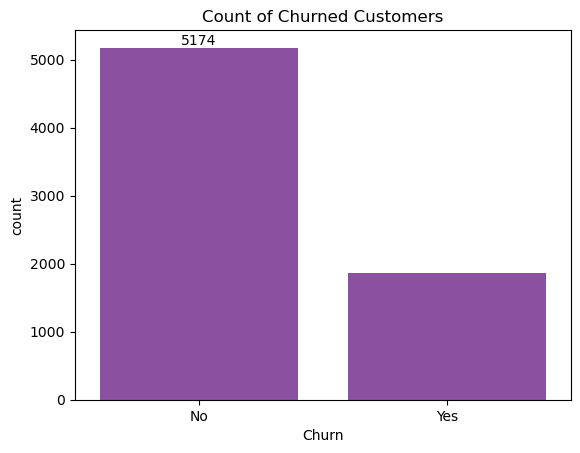

In [254]:
ax = sns.countplot( x='Churn', data = df, palette= ['#8e44ad'])

ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customers")


Text(0.5, 1.0, 'Percentage of Churned Customers')

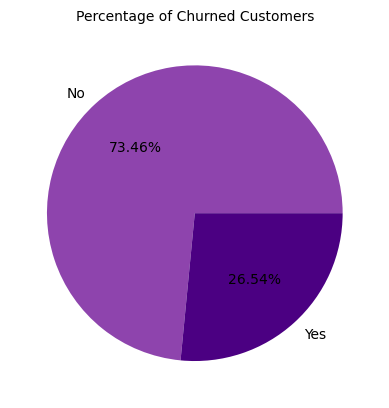

In [255]:
plt.Figure(figsize= (3,4))
gb = df.groupby("Churn").agg({'Churn' : 'count'})
purple_shades = ['#8e44ad', '#4B0082']
plt.pie(gb['Churn'], labels = gb.index, autopct= '%1.2f%%', colors= purple_shades)
plt.title("Percentage of Churned Customers", fontsize= 10)

#  From the given pei chart we can conclude that 26.54 has churned out

Text(0.5, 1.0, 'Gender-wise Churn Count')

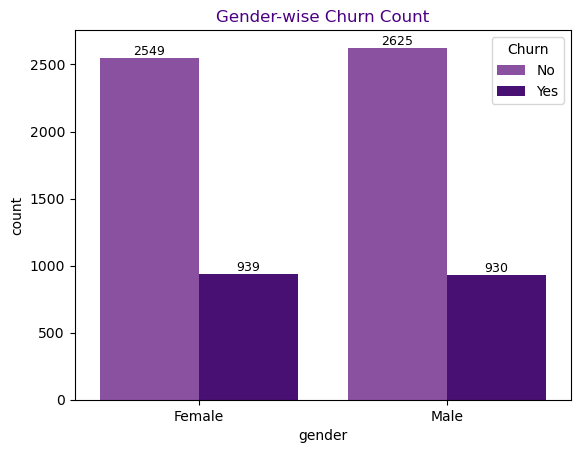

In [256]:
# Countplot with hue
bx = sns.countplot(x='gender', data=df, hue='Churn', palette=['#8e44ad', '#4B0082'])  # Purple shades

# Add labels to all hue bars
for container in bx.containers:
    bx.bar_label(container, fontsize=9, color='Black')

# Add title and improve style
plt.title("Gender-wise Churn Count", fontsize=12, color='#4B0082')

Text(0.5, 1.0, 'SeniorCitizen Churn Count')

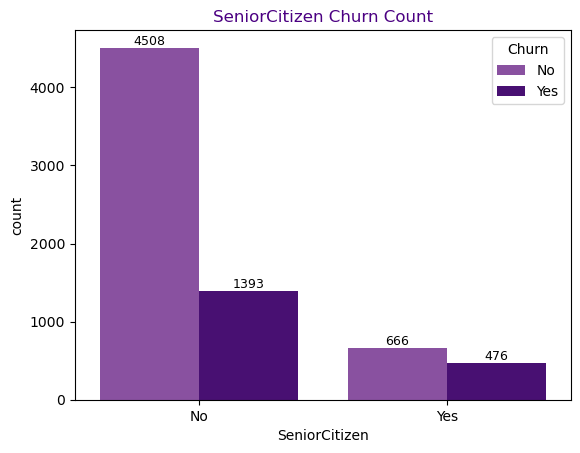

In [257]:
# Countplot with hue
bx = sns.countplot(x='SeniorCitizen', data=df, hue='Churn', palette=['#8e44ad', '#4B0082'])  # Purple shades

# Add labels to all hue bars
for container in bx.containers:
    bx.bar_label(container, fontsize=9, color='Black')

# Add title and improve style
plt.title("SeniorCitizen Churn Count", fontsize=12, color='#4B0082')

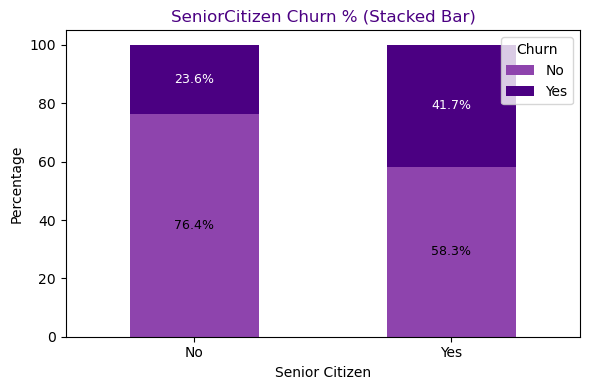

In [258]:
# Step 1: Prepare the data
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Step 2: Calculate percentage
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
colors = ['#8e44ad', '#4B0082']
ax = percentages.plot(kind='bar', stacked=True, color=colors, figsize=(6, 4))

# Step 4: Add percentage labels
for i, (idx, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(
                i, cumulative + val / 2,
                f"{val:.1f}%",
                ha='center', va='center',
                fontsize=9, color='white' if j == 1 else 'black'
            )
            cumulative += val

# Step 5: Final formatting
plt.title("SeniorCitizen Churn % (Stacked Bar)", fontsize=12, color='#4B0082')
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(ticks=range(len(counts.index)), labels=counts.index, rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

In [259]:
# Greater Percentage of senior citizen have churned out.

In [260]:
# This gives you the count of rows that match your condition.
df[df['SeniorCitizen'] == 'Yes'].shape[0]

1142

Text(0.5, 1.0, 'Count vs Tenure Histgram')

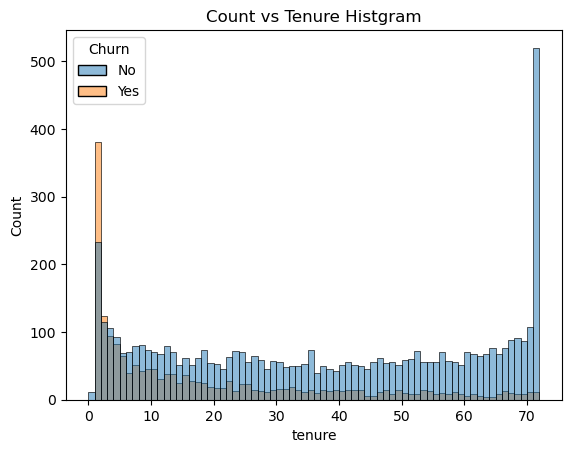

In [261]:
plt.Figure(figsize=(9,4))
sns.histplot(x='tenure', data= df, bins=72 , hue = 'Churn')
plt.title("Count vs Tenure Histgram")

#  People who have used our services for long time have stayed and people who have used our dervices #1 or 2 months have churned.

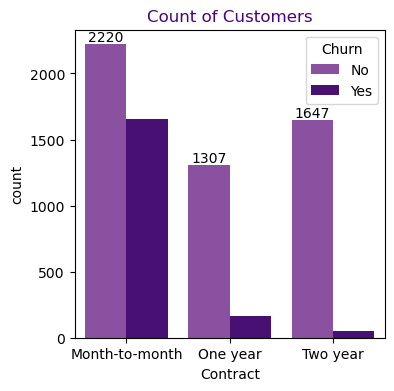

In [262]:
# Countplot with hue
plt.figure(figsize=(4,4))
bx = sns.countplot(x='Contract', data=df, hue= 'Churn',palette = ['#8e44ad', '#4B0082'])  # Purple shades
bx.bar_label(bx.containers[0])

# Add title and improve style
plt.title("Count of Customers", fontsize=12, color='#4B0082')
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [263]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

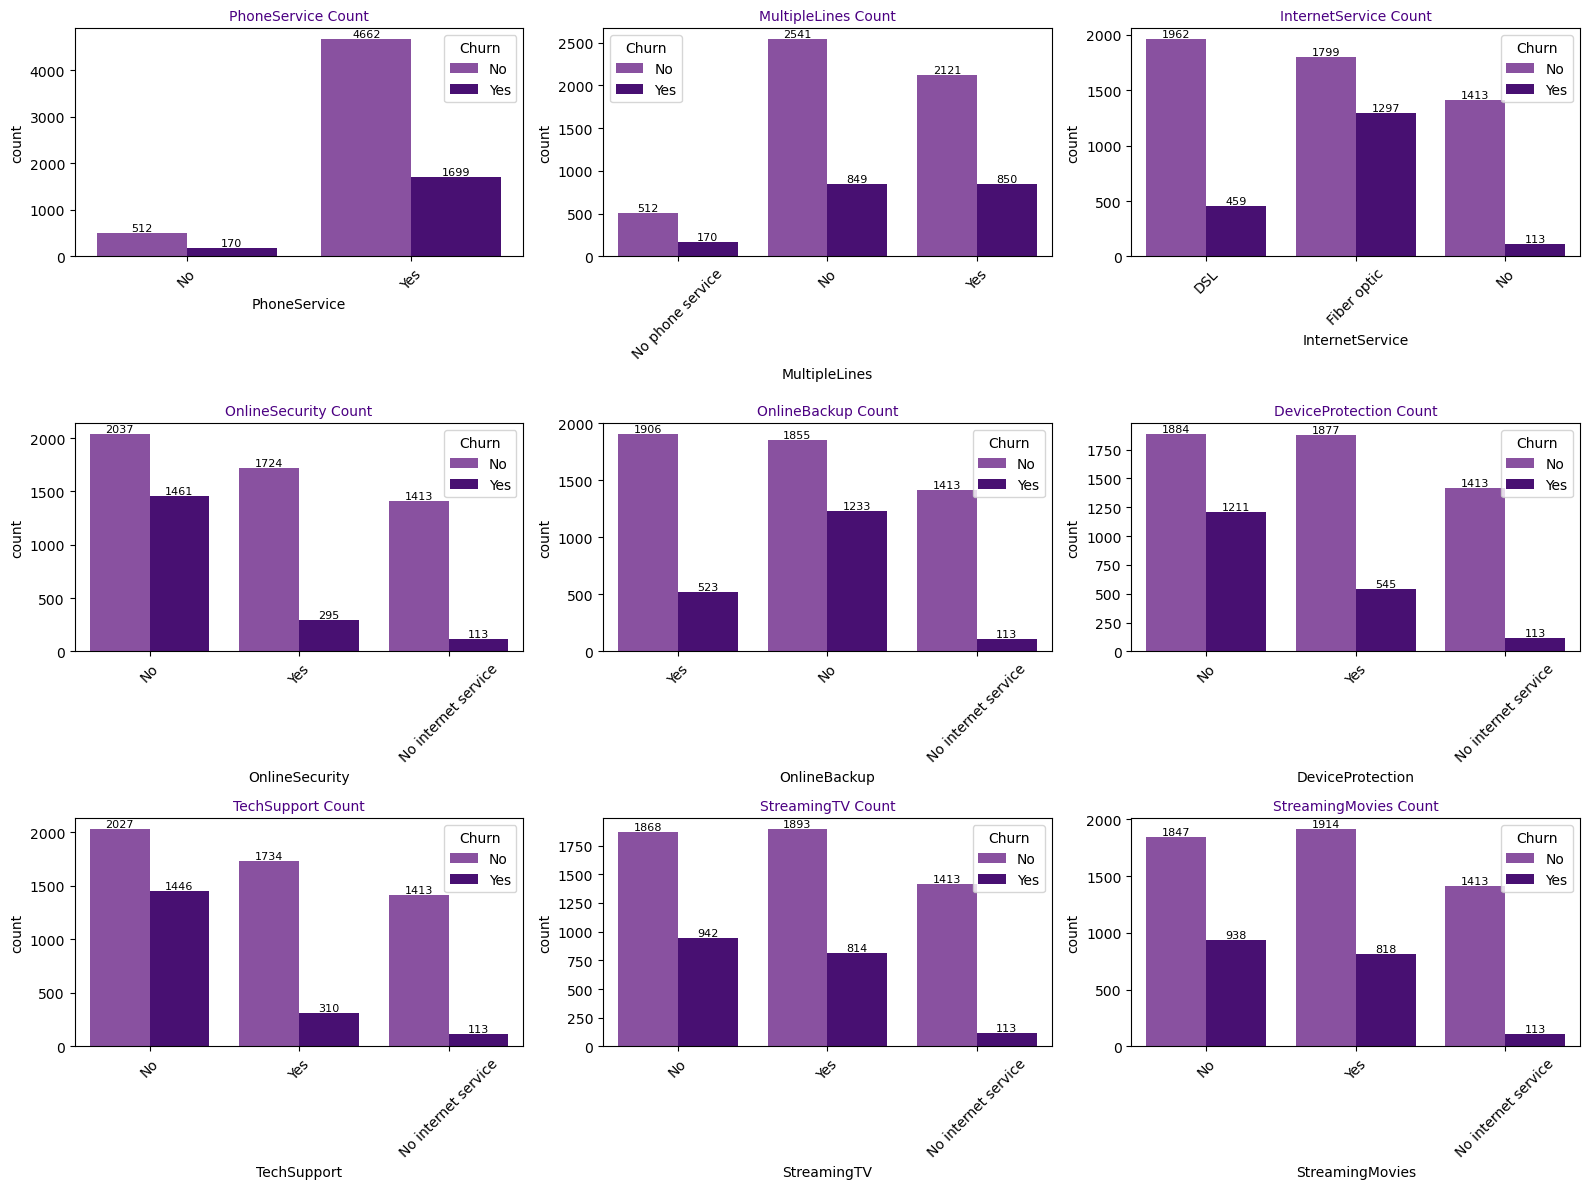

In [264]:
cols_to_plot = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

# Loop and plot with single solid color
for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i],hue = 'Churn', palette = ['#8e44ad', '#4B0082'])
    axes[i].set_title(f"{col} Count", fontsize=10, color='#4B0082')
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=8, color='black')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any extra unused plots
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Customers who lack internet-related services (e.g., OnlineSecurity, TechSupport, StreamingTV) or have “No” for those services tend to churn more. Meanwhile, those with services active (e.g., "Yes" for OnlineSecurity or StreamingTV) show lower churn, indicating that bundled features may increase retention.

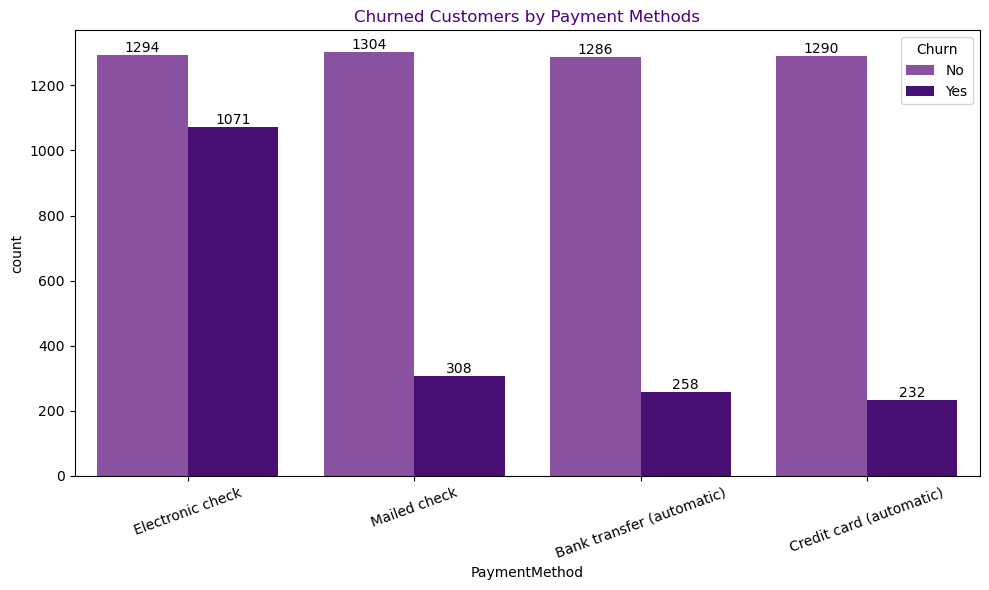

In [268]:
plt.figure(figsize=(10, 6))
bx = sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=['#8e44ad', '#4B0082'])
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title("Churned Customers by Payment Methods", fontsize=12, color='#4B0082')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Customers are likely to churn more when transactions happend through electronic check 